# EN2550: Assignment 03 on Object Counting on a Conveyor Belt
## Connected Component Analysis
In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).
1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

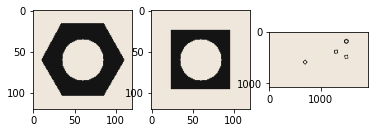

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
conveyor_f101 =  cv.imread('conveyor_f101.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. State the threshold value (automatically) selected in the operation. Display the output images.

Threshold for hexnut_template is 114.0
Threshold for squarenut_template is 114.0
Threshold for conveyor_f100 is 126.0
Threshold for conveyor_f101 is 126.0


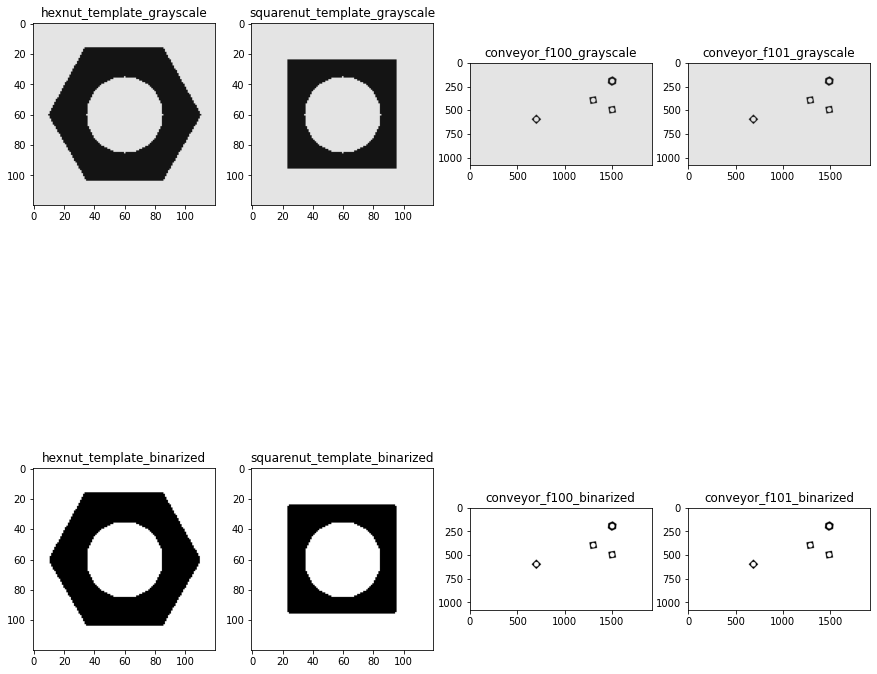

In [2]:
# Otsu's thresholding after Gaussian filtering
images = [hexnut_template, squarenut_template, conveyor_f100, conveyor_f101]
titles = ["hexnut_template", "squarenut_template", "conveyor_f100", "conveyor_f101"]
binarized_images = []

fig,ax = plt.subplots(2,4, figsize = (15,15))

for i in range(len(images)):
    gray_image = cv.cvtColor(images[i], cv.COLOR_RGB2GRAY)
    blur = cv.GaussianBlur(gray_image,(5,5),0)
    threshold_value, binary_image = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
   
    binarized_images.append(binary_image) #Because later we want to call these images
    ax[0,i].imshow(cv.cvtColor(gray_image, cv.COLOR_RGB2BGR)) ; ax[0,i].set_title(titles[i]+"_grayscale")
    ax[1,i].imshow(cv.cvtColor(binary_image, cv.COLOR_RGB2BGR)) ; ax[1,i].set_title(titles[i]+"_binarized")
    print("Threshold for %s is %s"%(titles[i], threshold_value))
plt.show()
  

2. Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel.

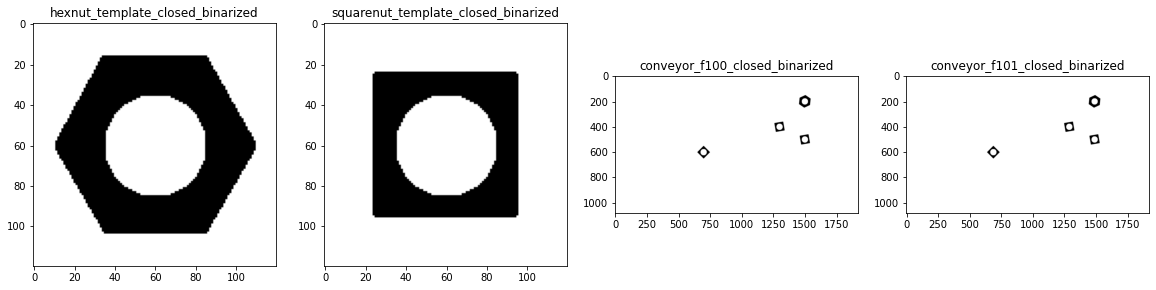

In [3]:
kernel = np.ones((3,3),np.uint8)
closed_binarized_images = []

fig, ax = plt.subplots(1,4, figsize = (20,20))

for i in range(len(images)):
    closing = cv.morphologyEx(binarized_images[i], cv.MORPH_CLOSE, kernel)
    closed_binarized_images.append(closing)
    ax[i].imshow(cv.cvtColor(closing, cv.COLOR_BGR2RGB))
    ax[i].set_title(titles[i]+"_closed_binarized")
plt.show()

Connected components analysis. 

hexnut_template
Number of connected components in hexnut_template is 3.
Stats for hexnut_template=
 [[  11   16   99   88 4726]
 [   0    0  120  120 7717]
 [  36   36   49   49 1957]]
Centroids are as follows :
-->  59.834 , 59.223
-->  59.169 , 59.543
-->  60.0 , 60.0


squarenut_template
Number of connected components in squarenut_template is 3.
Stats for squarenut_template=
 [[  24   24   72   72 3223]
 [   0    0  120  120 9220]
 [  36   36   49   49 1957]]
Centroids are as follows :
-->  59.196 , 59.196
-->  59.5 , 59.5
-->  60.0 , 60.0


conveyor_f100
Number of connected components in conveyor_f100 is 6.
Stats for conveyor_f100=
 [[    651     151     895     499   13922]
 [      0       0    1920    1080 2051850]
 [   1476     176      49      49    1957]
 [   1276     376      49      49    1957]
 [   1476     476      49      49    1957]
 [    676     576      49      49    1957]]
Centroids are as follows :
-->  1274.778 , 400.054
-->  956.253 , 540.883
-->  1500.0 , 200.0
--

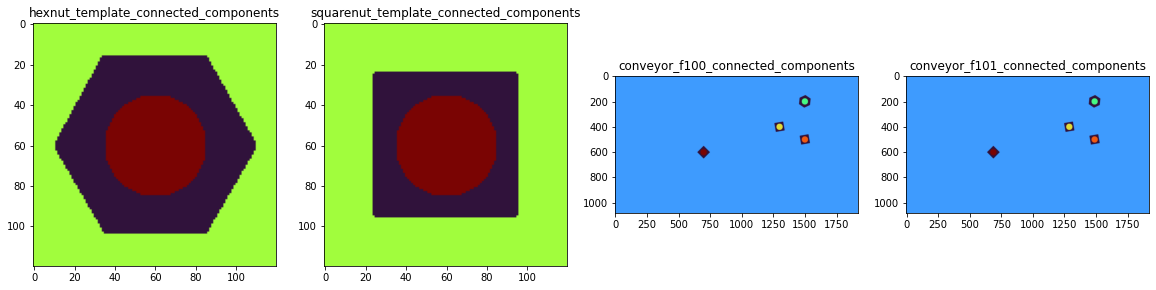

In [4]:
connected_components = []
fig, ax = plt.subplots(1,4,figsize = (20,20))

for i in range(4):
    retbal, labels, stats, centroids = cv.connectedComponentsWithStats(closed_binarized_images[i])
    colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_TURBO)
    connected_components.append(colormapped)
    ax[i].imshow(cv.cvtColor(colormapped,cv.COLOR_BGR2RGB))
    ax[i].set_title(titles[i]+"_connected_components")
    print(titles[i])
    print("Number of connected components in %s is %s."%(titles[i],np.shape(stats)[0]))
    print("Stats for %s=\n"%(titles[i]), stats)
    print("Centroids are as follows :")
    for j in range(len(centroids)):
        print('--> ', round(centroids[j][0],3),',', round(centroids[j][1],3))
        if j==len(centroids)-1: print('\n')
plt.show()

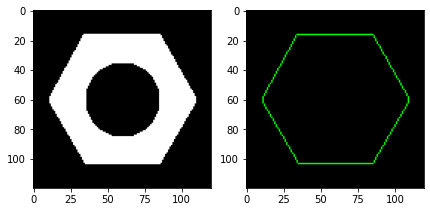

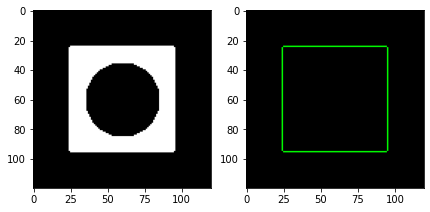

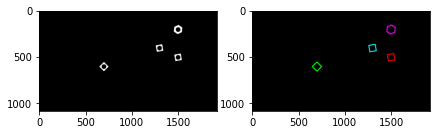

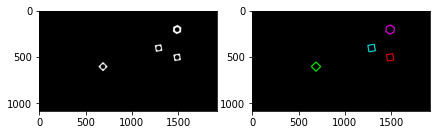

In [13]:

colors = [(0,255,0),(0,0,255),(255,255,0),(255,0,255)]
thicknesses = [1,1,10,10]

for i in range(4):
    thresh = 255 - closed_binarized_images[i]
    thresh = cv.cvtColor(thresh,cv.COLOR_RGB2BGR)
    thresh = cv.cvtColor(thresh, cv.COLOR_BGR2GRAY)

    
    cnts = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    black_background = np.zeros(np.shape(images[i]), dtype='uint8')

    for j in range(len(cnts)):
        c = cnts[j]

        cv.drawContours(black_background, [c], -1, colors[j], thicknesses[i])
        
        
    fig, ax = plt.subplots(1,2, figsize = (7,7))
    ax[0].imshow(cv.cvtColor(thresh, cv.COLOR_RGB2BGR))
    ax[1].imshow(cv.cvtColor(black_background, cv.COLOR_RGB2BGR))
    plt.show()

